In [60]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [61]:
len(tf.config.list_physical_devices("GPU"))>0

True

In [62]:
bs = 32
img_size = 128

train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

In [63]:
dataset = image_dataset_from_directory(
    'sign_digits_dataset',
    batch_size = bs,
    seed = 42,
    image_size = (img_size,img_size)
)

Found 2062 files belonging to 10 classes.


In [64]:
dataset_size = len(dataset)
train_size = int(train_ratio*dataset_size)
val_size = int(val_ratio*dataset_size)
test_size = int(test_ratio*dataset_size)

train_ds = dataset.take(train_size)
remaining_ds = dataset.skip(train_size)
val_ds = remaining_ds.take(val_size)
test_ds = remaining_ds.skip(val_size)

print("Length of dataset: ",len(dataset))
print("Length of training set: ",len(train_ds))
print("Length of validation set: ",len(val_ds))
print("Length of testing set: ",len(test_ds))

Length of dataset:  65
Length of training set:  45
Length of validation set:  9
Length of testing set:  11


In [65]:
num_classes = len(dataset.class_names)

dataset.class_names

['eight',
 'five',
 'four',
 'nine',
 'one',
 'seven',
 'six',
 'three',
 'two',
 'zero']

[[[130.       129.       125.      ]
  [132.01562  131.01562  127.015625]
  [133.90625  132.90625  128.90625 ]
  ...
  [118.90625  114.90625  113.90625 ]
  [117.671875 113.671875 112.671875]
  [117.       113.       112.      ]]

 [[130.67188  129.67188  125.671875]
  [132.6875   131.6875   127.6875  ]
  [134.57812  133.57812  129.57812 ]
  ...
  [119.578125 115.578125 114.578125]
  [118.34375  114.34375  113.34375 ]
  [117.671875 113.671875 112.671875]]

 [[131.45312  130.45312  126.453125]
  [133.7732   132.7732   128.7732  ]
  [135.8125   134.8125   130.8125  ]
  ...
  [120.8125   116.8125   115.8125  ]
  [119.42944  115.42944  114.42944 ]
  [118.453125 114.453125 113.453125]]

 ...

 [[127.90625  126.90625  122.90625 ]
  [129.92188  128.92188  124.921875]
  [132.0603   131.0603   127.0603  ]
  ...
  [115.359375 112.359375 107.359375]
  [114.125    111.125    106.125   ]
  [113.453125 110.453125 105.453125]]

 [[126.671875 125.671875 121.671875]
  [128.46704  127.46704  123.46704 ]


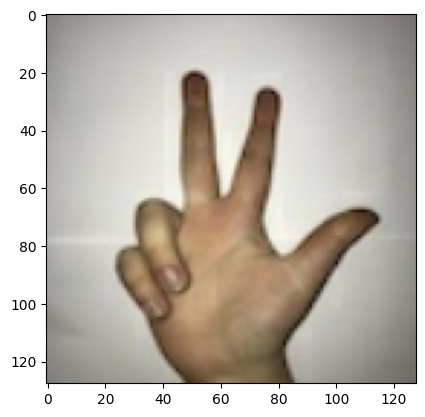

In [66]:
for image_batch,label_batch in train_ds.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    print(image_batch[1].numpy())

In [67]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    # layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'),
    # layers.Dropout(0.3),
    # layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'), 
    layers.Dense(num_classes,activation = 'softmax')   
])

In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 dropout_4 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                  

In [69]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history= model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
45/45 [==============================] - 13s 255ms/step - loss: 18.3027 - accuracy: 0.0965 - val_loss: 2.3084 - val_accuracy: 0.0764
Epoch 2/10
45/45 [==============================] - 11s 250ms/step - loss: 2.3486 - accuracy: 0.1028 - val_loss: 2.3048 - val_accuracy: 0.0660
Epoch 3/10
45/45 [==============================] - 11s 253ms/step - loss: 2.3220 - accuracy: 0.1000 - val_loss: 2.2814 - val_accuracy: 0.1632
Epoch 4/10
45/45 [==============================] - 11s 250ms/step - loss: 2.3238 - accuracy: 0.1187 - val_loss: 2.2854 - val_accuracy: 0.1181
Epoch 5/10
45/45 [==============================] - 11s 252ms/step - loss: 2.2928 - accuracy: 0.1333 - val_loss: 2.2701 - val_accuracy: 0.2396
Epoch 6/10
45/45 [==============================] - 11s 250ms/step - loss: 2.1363 - accuracy: 0.2326 - val_loss: 2.1186 - val_accuracy: 0.2708
Epoch 7/10
45/45 [==============================] - 11s 251ms/step - loss: 1.9352 - accuracy: 0.2868 - val_loss: 2.0562 - val_accuracy: 0.270

In [70]:
model.evaluate(test_ds)

11/11 [==============================] - 1s 42ms/step - loss: 1.5213 - accuracy: 0.5150


[1.521329641342163, 0.514970064163208]

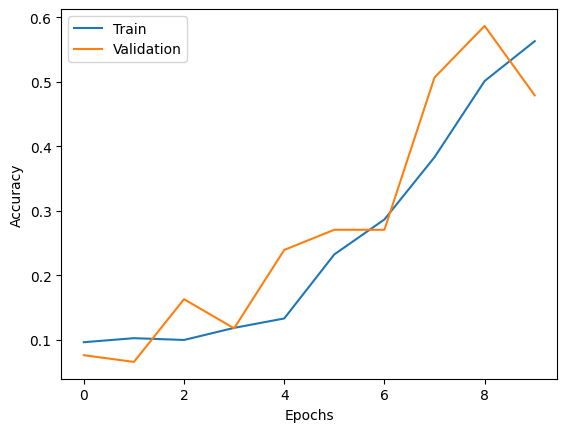

In [71]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

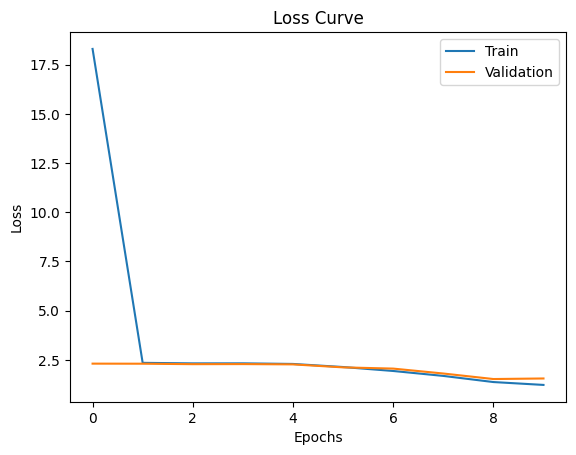

In [72]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

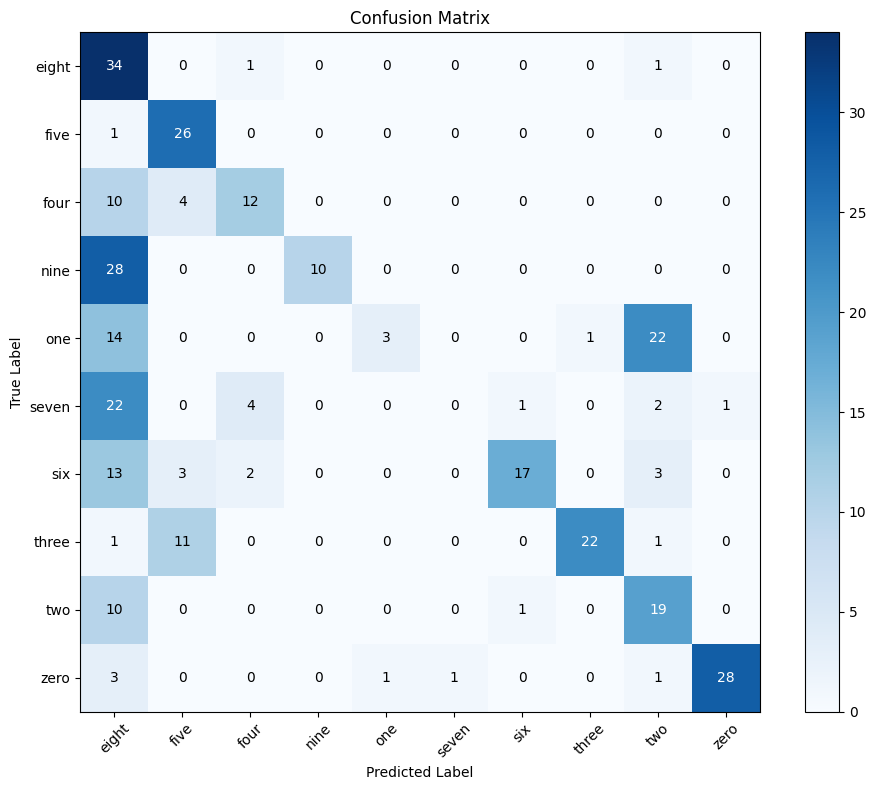

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(10))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

Data Augmentation


As we have not enough data for the training, we will use data augmentation techniques to expand our data for model's better performance

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show

In [16]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, channel_shift_range = 10, horizontal_flip = True)

In [75]:
import random,os
chosen_image = random.choice(os.listdir('C:\Deep Learning\keras_with_tensorflow\sign_digits_dataset\one'))



In [82]:
image_path= 'C:\Deep Learning/keras_with_tensorflow/sign_digits_dataset/one/' + chosen_image

In [83]:
assert os.path.isfile(image_path)

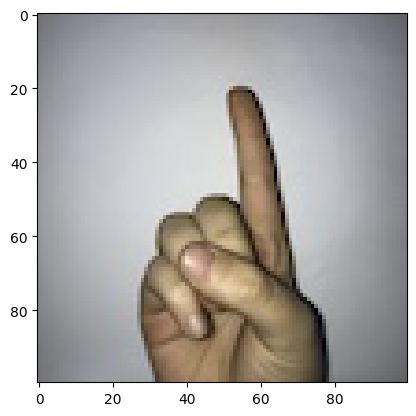

In [84]:
image = np.expand_dims(plt.imread(image_path),0)
plt.imshow(image[0])

In [85]:
aug_iter = gen.flow(image)

In [86]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

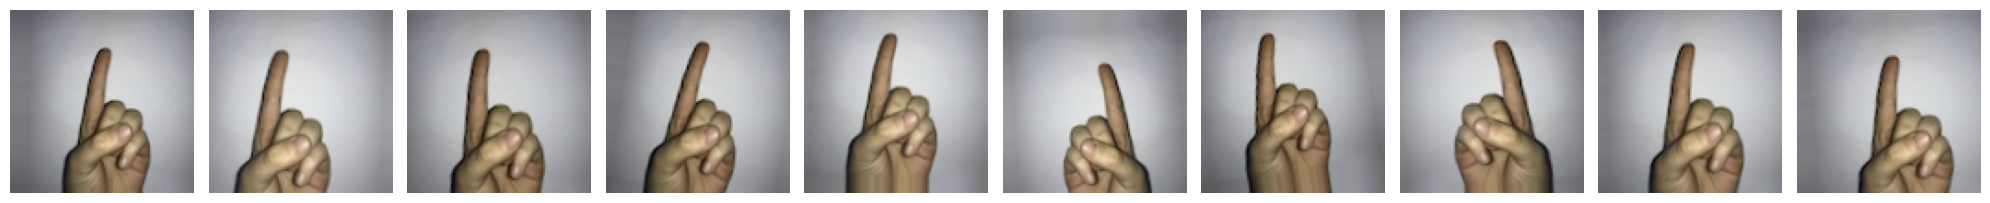

In [87]:
plotImages(aug_images)

In [89]:
import os
import numpy as np
from PIL import Image, ImageEnhance
from keras.preprocessing.image import ImageDataGenerator

input_directory = r'C:\Deep Learning\keras_with_tensorflow\sign_digits_dataset'
output_directory = r'C:\Deep Learning\keras_with_tensorflow\augmented_sign_digits_dataset'

SIZE = 224
# Initialize the ImageDataGenerator for other augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)


# Create a function for color augmentation using Pillow

for root, dirs, files in os.walk(input_directory):
    for dir_name in dirs:
        input_subfolder = os.path.join(root, dir_name)
        output_subfolder = os.path.join(output_directory, os.path.relpath(input_subfolder, input_directory))

        if not os.path.exists(output_subfolder):
            os.makedirs(output_subfolder)

        my_images = os.listdir(input_subfolder)

        for image_name in my_images:
            if image_name.split('.')[-1] == 'jpg'or image_name.split('.')[-1] == 'JPG':
                image = Image.open(os.path.join(input_subfolder, image_name))
                image = np.array(image)
                image = image.reshape((1,) + image.shape)  # Add an extra dimension for the batch size

                i = 0
                for batch in datagen.flow(image, batch_size=16, save_to_dir=output_subfolder, save_prefix='object_name', save_format='jpg'):
                    i += 1
                    if i > 10:
                        break
print('Complete')

Complete


In [90]:
dataset = image_dataset_from_directory(
    'augmented_sign_digits_dataset',
    batch_size = bs,
    seed = 42,
    image_size = (img_size,img_size)
)

Found 20339 files belonging to 10 classes.


In [91]:
dataset_size = len(dataset)
train_size = int(train_ratio*dataset_size)
val_size = int(val_ratio*dataset_size)
test_size = int(test_ratio*dataset_size)

train_ds = dataset.take(train_size)
remaining_ds = dataset.skip(train_size)
val_ds = remaining_ds.take(val_size)
test_ds = remaining_ds.skip(val_size)

print("Length of dataset: ",len(dataset))
print("Length of training set: ",len(train_ds))
print("Length of validation set: ",len(val_ds))
print("Length of testing set: ",len(test_ds))

Length of dataset:  636
Length of training set:  445
Length of validation set:  95
Length of testing set:  96


In [92]:
num_classes = len(dataset.class_names)

dataset.class_names

['eight',
 'five',
 'four',
 'nine',
 'one',
 'seven',
 'six',
 'three',
 'two',
 'zero']

[[[144.       142.       143.      ]
  [144.       142.       143.      ]
  [144.45312  142.45312  143.45312 ]
  ...
  [171.45312  171.45312  171.45312 ]
  [171.       171.       171.      ]
  [171.       171.       171.      ]]

 [[144.       142.       143.      ]
  [144.       142.       143.      ]
  [144.45312  142.45312  143.45312 ]
  ...
  [171.14868  171.14868  171.14868 ]
  [170.77954  170.77954  170.77954 ]
  [170.32812  170.32812  170.32812 ]]

 [[144.45312  142.45312  143.45312 ]
  [144.45312  142.45312  143.45312 ]
  [144.70093  142.70093  143.70093 ]
  ...
  [170.7522   170.7522   170.7522  ]
  [170.36743  170.36743  170.36743 ]
  [170.       170.       170.      ]]

 ...

 [[146.73438  129.73438   99.734375]
  [148.68701  131.68701  101.68701 ]
  [151.45312  134.90625  103.546875]
  ...
  [140.       140.       140.      ]
  [140.6018   140.6018   140.6018  ]
  [140.90625  140.90625  140.90625 ]]

 [[149.98438  132.98438  102.984375]
  [151.10767  134.10767  104.107666]


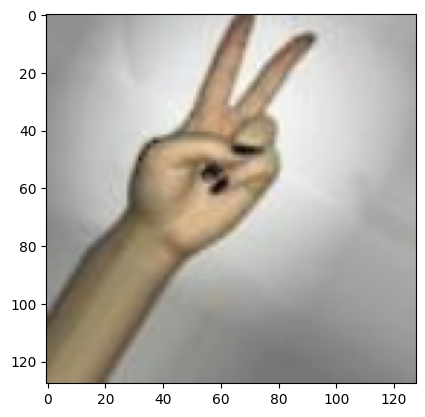

In [93]:
for image_batch,label_batch in train_ds.take(1):
    plt.imshow(image_batch[1].numpy().astype("uint8"))
    print(image_batch[1].numpy())
    

In [94]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'), 
    layers.Dense(num_classes,activation = 'softmax')   
])

In [95]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 dropout_8 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 dropout_9 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                  

In [96]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history= model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
445/445 [==============================] - 114s 251ms/step - loss: 3.3546 - accuracy: 0.2000 - val_loss: 2.0112 - val_accuracy: 0.4036
Epoch 2/10
445/445 [==============================] - 106s 238ms/step - loss: 1.3848 - accuracy: 0.4918 - val_loss: 1.5391 - val_accuracy: 0.5974
Epoch 3/10
445/445 [==============================] - 105s 237ms/step - loss: 0.9356 - accuracy: 0.6608 - val_loss: 1.1204 - val_accuracy: 0.7688
Epoch 4/10
445/445 [==============================] - 106s 238ms/step - loss: 0.6844 - accuracy: 0.7587 - val_loss: 0.9740 - val_accuracy: 0.7839
Epoch 5/10
445/445 [==============================] - 105s 236ms/step - loss: 0.4973 - accuracy: 0.8242 - val_loss: 0.7743 - val_accuracy: 0.8615
Epoch 6/10
445/445 [==============================] - 106s 237ms/step - loss: 0.4252 - accuracy: 0.8547 - val_loss: 0.7360 - val_accuracy: 0.8385
Epoch 7/10
445/445 [==============================] - 106s 238ms/step - loss: 0.3562 - accuracy: 0.8782 - val_loss: 0.6280 -

In [97]:
model.evaluate(test_ds)

96/96 [==============================] - 12s 64ms/step - loss: 0.4928 - accuracy: 0.9248


[0.49275001883506775, 0.9248120188713074]

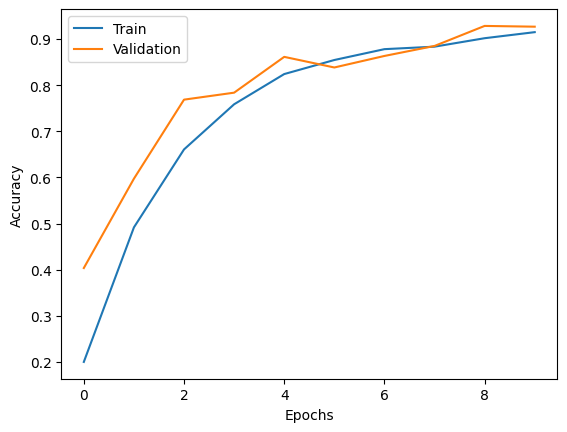

In [98]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

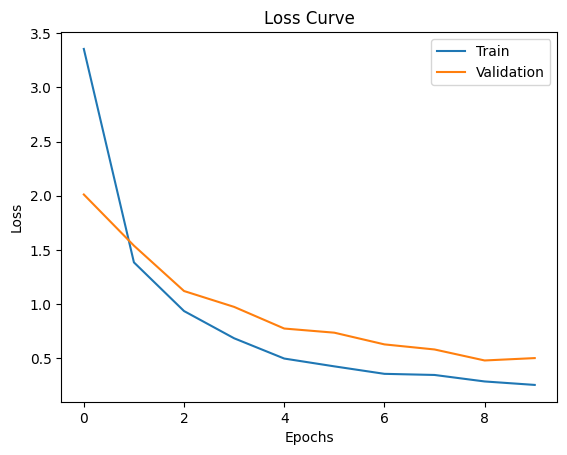

In [99]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

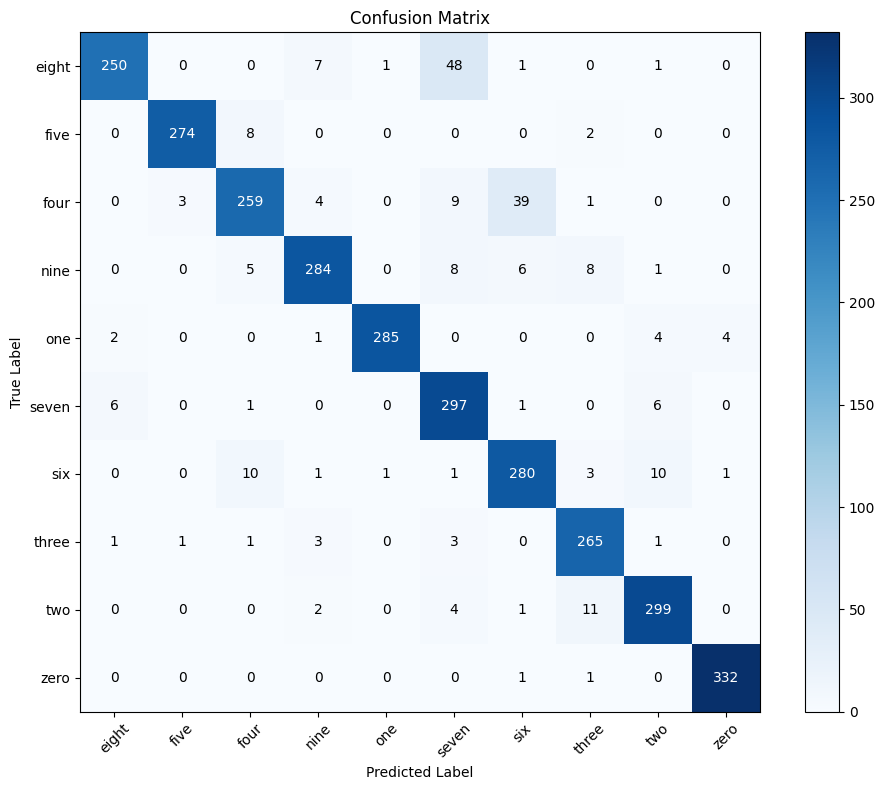

In [100]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(10))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [103]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    # layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'),
    # layers.Dropout(0.3),
    # layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'), 
    layers.Dense(num_classes,activation = 'softmax')   
])

In [104]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 dropout_17 (Dropout)        (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 dropout_18 (Dropout)        (None, 61, 61, 32)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                 

In [105]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history= model.fit(train_ds, validation_data=val_ds, epochs = 10)

Epoch 1/10
445/445 [==============================] - 92s 199ms/step - loss: 2.6457 - accuracy: 0.1095 - val_loss: 2.3011 - val_accuracy: 0.1072
Epoch 2/10
445/445 [==============================] - 89s 199ms/step - loss: 2.2871 - accuracy: 0.1216 - val_loss: 2.2554 - val_accuracy: 0.1816
Epoch 3/10
445/445 [==============================] - 88s 197ms/step - loss: 1.8351 - accuracy: 0.3070 - val_loss: 1.7576 - val_accuracy: 0.4576
Epoch 4/10
445/445 [==============================] - 87s 195ms/step - loss: 1.2590 - accuracy: 0.5265 - val_loss: 1.4682 - val_accuracy: 0.6224
Epoch 5/10
445/445 [==============================] - 87s 194ms/step - loss: 0.8907 - accuracy: 0.6761 - val_loss: 1.3574 - val_accuracy: 0.7230
Epoch 6/10
445/445 [==============================] - 87s 195ms/step - loss: 0.6870 - accuracy: 0.7598 - val_loss: 1.0473 - val_accuracy: 0.8579
Epoch 7/10
445/445 [==============================] - 87s 196ms/step - loss: 0.5214 - accuracy: 0.8201 - val_loss: 0.8731 - val_ac

In [107]:
model.evaluate(test_ds)

96/96 [==============================] - 11s 50ms/step - loss: 0.7182 - accuracy: 0.9232


[0.7182108759880066, 0.9231774806976318]

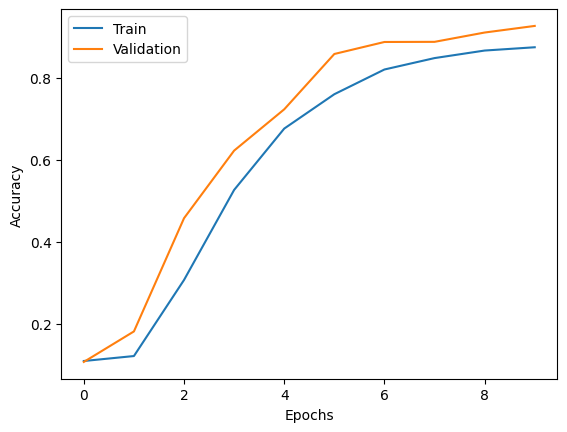

In [108]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

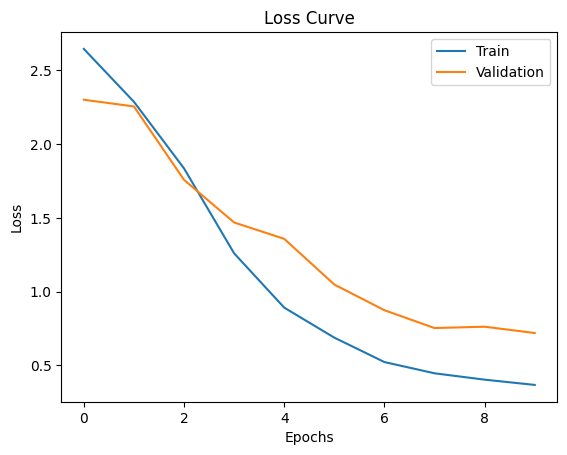

In [109]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

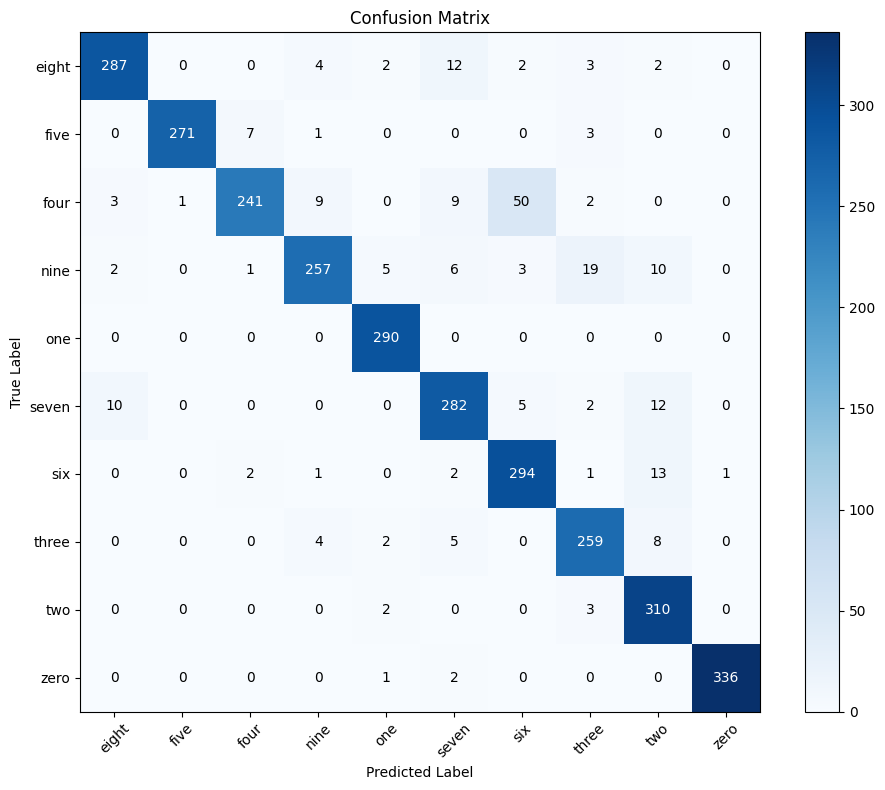

In [110]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(10))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [111]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    # layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    # layers.Dropout(0.3),
    # layers.MaxPooling2D(2,2),
    # layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    # layers.Dropout(0.3),
    # layers.MaxPooling2D(2,2),
    layers.Conv2D(128,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'), 
    layers.Dense(num_classes,activation = 'softmax')   
])

In [112]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 dropout_23 (Dropout)        (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 dropout_24 (Dropout)        (None, 63, 63, 64)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                 

In [114]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history= model.fit(train_ds, validation_data=val_ds, epochs = 20)

Epoch 1/20
445/445 [==============================] - 23s 50ms/step - loss: 1.5990 - accuracy: 0.4294 - val_loss: 1.8155 - val_accuracy: 0.3786
Epoch 2/20
445/445 [==============================] - 22s 50ms/step - loss: 1.1294 - accuracy: 0.5857 - val_loss: 1.1825 - val_accuracy: 0.6168
Epoch 3/20
445/445 [==============================] - 22s 50ms/step - loss: 0.8702 - accuracy: 0.6779 - val_loss: 0.9686 - val_accuracy: 0.7217
Epoch 4/20
445/445 [==============================] - 22s 50ms/step - loss: 0.8220 - accuracy: 0.7028 - val_loss: 0.9961 - val_accuracy: 0.7329
Epoch 5/20
445/445 [==============================] - 22s 50ms/step - loss: 0.6444 - accuracy: 0.7704 - val_loss: 1.1426 - val_accuracy: 0.5362
Epoch 6/20
445/445 [==============================] - 23s 51ms/step - loss: 0.5897 - accuracy: 0.7906 - val_loss: 0.6984 - val_accuracy: 0.8188
Epoch 7/20
445/445 [==============================] - 23s 51ms/step - loss: 0.5109 - accuracy: 0.8158 - val_loss: 0.6357 - val_accuracy:

In [115]:
model.evaluate(test_ds)

96/96 [==============================] - 5s 17ms/step - loss: 0.2899 - accuracy: 0.9212


[0.28987497091293335, 0.9212160706520081]

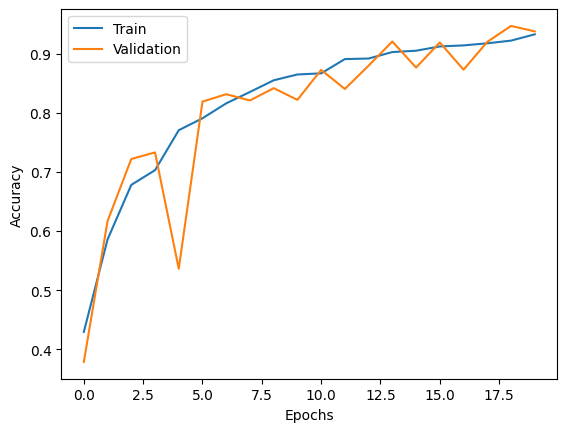

In [116]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

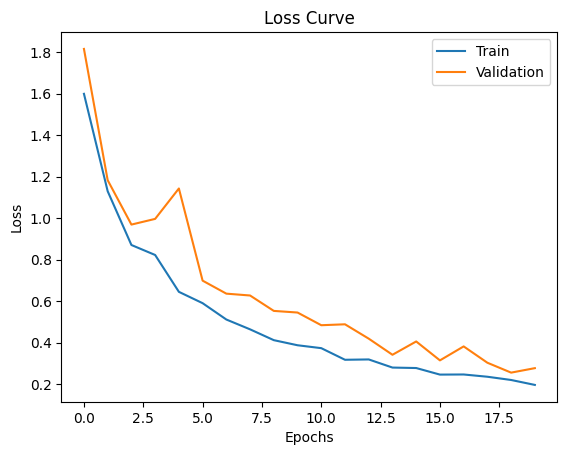

In [117]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

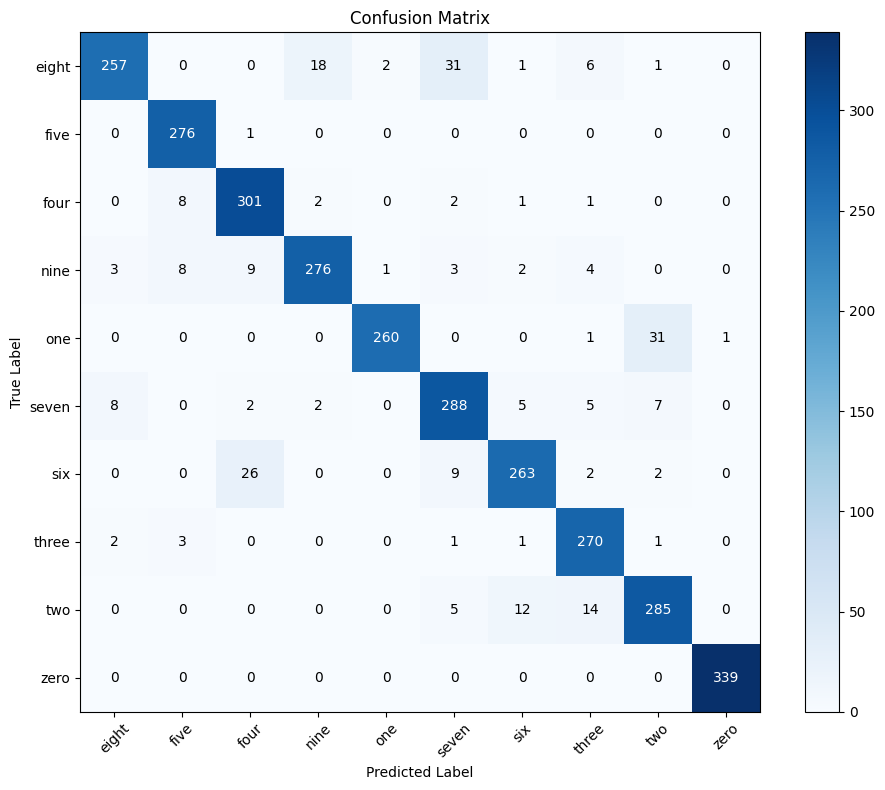

In [118]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(10))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [119]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), input_shape = (128,128,3), activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),padding='same', activation ='relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.Dropout(0.3),
    layers.MaxPooling2D(2,2),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.Dense(64,activation='relu'), 
    layers.Dense(num_classes,activation = 'softmax')   
])

In [120]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 dropout_26 (Dropout)        (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 dropout_27 (Dropout)        (None, 63, 63, 64)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                 

In [126]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics= ['accuracy'])

model_history= model.fit(train_ds, validation_data=val_ds, epochs = 20)

Epoch 1/20
445/445 [==============================] - 23s 49ms/step - loss: 0.2881 - accuracy: 0.9021 - val_loss: 0.4186 - val_accuracy: 0.9365
Epoch 2/20
445/445 [==============================] - 22s 49ms/step - loss: 0.2402 - accuracy: 0.9186 - val_loss: 0.3713 - val_accuracy: 0.9263
Epoch 3/20
445/445 [==============================] - 22s 49ms/step - loss: 0.2233 - accuracy: 0.9246 - val_loss: 0.3549 - val_accuracy: 0.9385
Epoch 4/20
445/445 [==============================] - 22s 49ms/step - loss: 0.1967 - accuracy: 0.9332 - val_loss: 0.3031 - val_accuracy: 0.9477
Epoch 5/20
445/445 [==============================] - 22s 49ms/step - loss: 0.1799 - accuracy: 0.9400 - val_loss: 0.3097 - val_accuracy: 0.9563
Epoch 6/20
445/445 [==============================] - 22s 49ms/step - loss: 0.1611 - accuracy: 0.9472 - val_loss: 0.3030 - val_accuracy: 0.9599
Epoch 7/20
445/445 [==============================] - 22s 48ms/step - loss: 0.1454 - accuracy: 0.9527 - val_loss: 0.2404 - val_accuracy:

In [127]:
model.evaluate(test_ds)

96/96 [==============================] - 5s 15ms/step - loss: 0.1400 - accuracy: 0.9823


[0.14004909992218018, 0.9823471903800964]

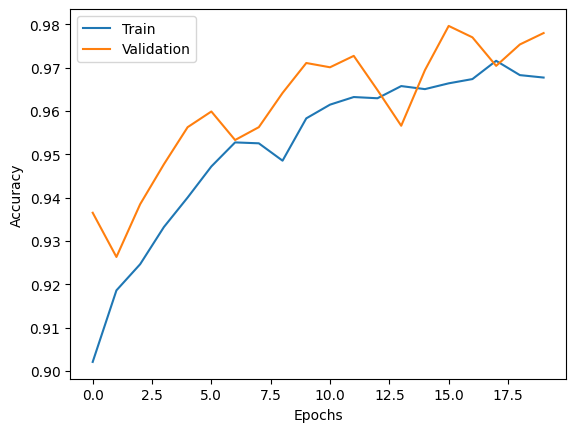

In [128]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

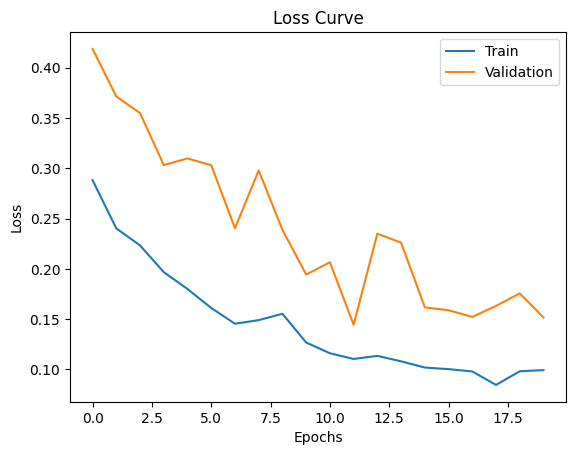

In [129]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend(['Train','Validation'])

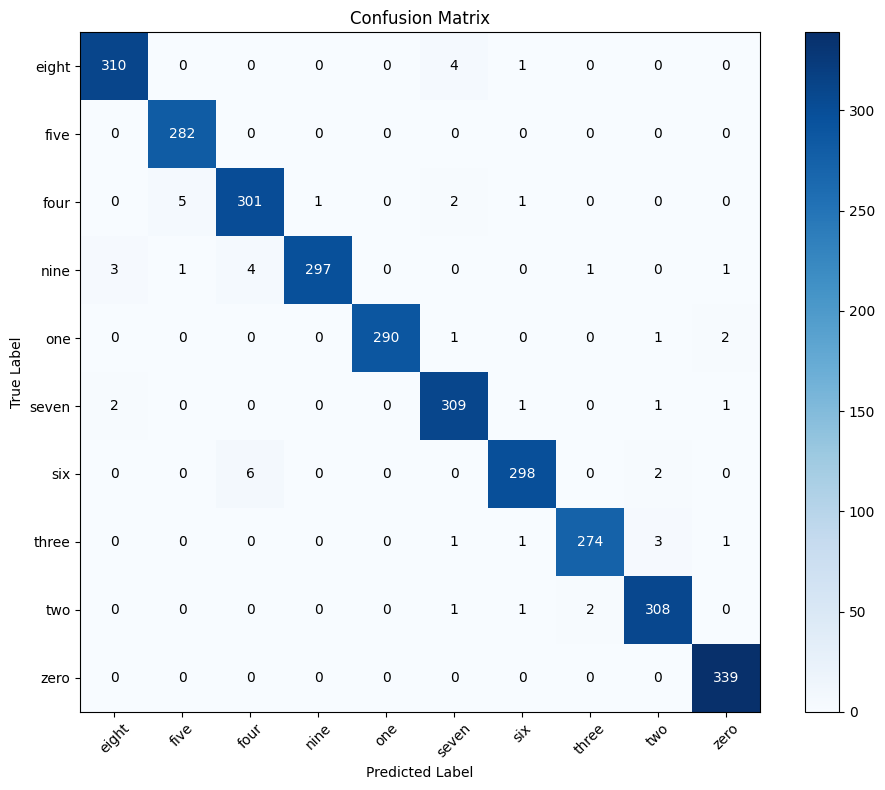

In [130]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_true=[]
y_pred=[]

for images,labels in test_ds:
    predictions=model.predict(images, verbose=0)
    predicted_labels=tf.argmax(predictions, axis=1)
    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels.numpy())
    
cm=confusion_matrix(y_true,y_pred,labels=range(10))
class_names=dataset.class_names

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
# Add labels to each cell
thresh = cm.max() / 2.
for i in range(10):
    for j in range(10):
        plt.text(j, i, format(cm[i, j], 'd'),
        ha="center", va="center",
        color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

In [165]:
import os.path
if os.path.isfile('saved_sign_digits_custom/sign_digits_custom.h5')is False:
    model.save('saved_sign_digits_custom/sign_digits_custom.h5')

In [166]:
from tensorflow.keras.models import load_model
new_model = load_model('saved_sign_digits_custom/sign_digits_custom.h5')

In [167]:
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 dropout_26 (Dropout)        (None, 126, 126, 32)      0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 63, 63, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 dropout_27 (Dropout)        (None, 63, 63, 64)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                 

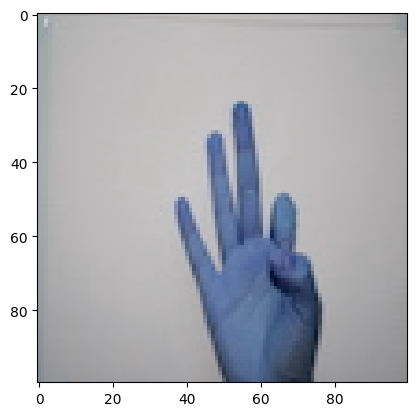

In [168]:
import cv2

image = cv2.imread('img_4.JPG')
plt.imshow(image)

In [169]:
image = cv2.resize(image,(128,128))
image = image.reshape(1,128,128,3)

In [170]:
threshold = 0.5
predictions = new_model.predict(image)
print(predictions)
predicted_class = np.argmax(predictions[0])
predicted_class

1/1 [==============================] - 0s 133ms/step
[[0.08446194 0.00671642 0.03754821 0.07908013 0.12532923 0.07640977
  0.09882083 0.0567672  0.08887037 0.34599593]]


9

In [156]:
dataset.class_names

['eight',
 'five',
 'four',
 'nine',
 'one',
 'seven',
 'six',
 'three',
 'two',
 'zero']

In [161]:
threshold = 0.5
predictions = model.predict(image)
binary_predictions = np.max(predictions)
binary_predictions

1/1 [==============================] - 0s 29ms/step


0.27387822

In [172]:
new_model.evaluate(test_ds)

96/96 [==============================] - 6s 14ms/step - loss: 0.1407 - accuracy: 0.9817


[0.14065009355545044, 0.9816933870315552]